# Challenge 1 - Design the Database
Using pen and paper (or computer software if you are skillful at creating digital diagrams), design a database to meet the minimal requirements of your boss. The minimal information to be recorded is described below:

Cars - e.g. the vehicle identification number (VIN), manufacturer, model, year, and color of the cars in your company's inventory.

Customers - e.g. the customer ID, name, phone number, email, address, city, state/province, country, and zip/postal code of the customers.

Salespersons - e.g. staff ID, name, and the store at your company.

Invoices - e.g. the invoice number, date, car, customer, and salesperson related to each car sale.

Before solving this challenge, review your lesson about database structure and design then ask yourself:

What entities and attributes should be included in the database?

For each attribute, what data type is most suitable?
Note that in MySQL typically each entity table should have an auto-increment numeric ID. The auto-increment ID is different from the customer ID or staff ID.
Also note that some attributes are required while other ones can be blank.
What are the relations between these entities? Which relations are one-to-one vs one-to-many vs many-to-many?

How can you use foreign keys to normalize your database design?

Your end product of this challenge should look something like below, though it doesn't have to be that complicated:
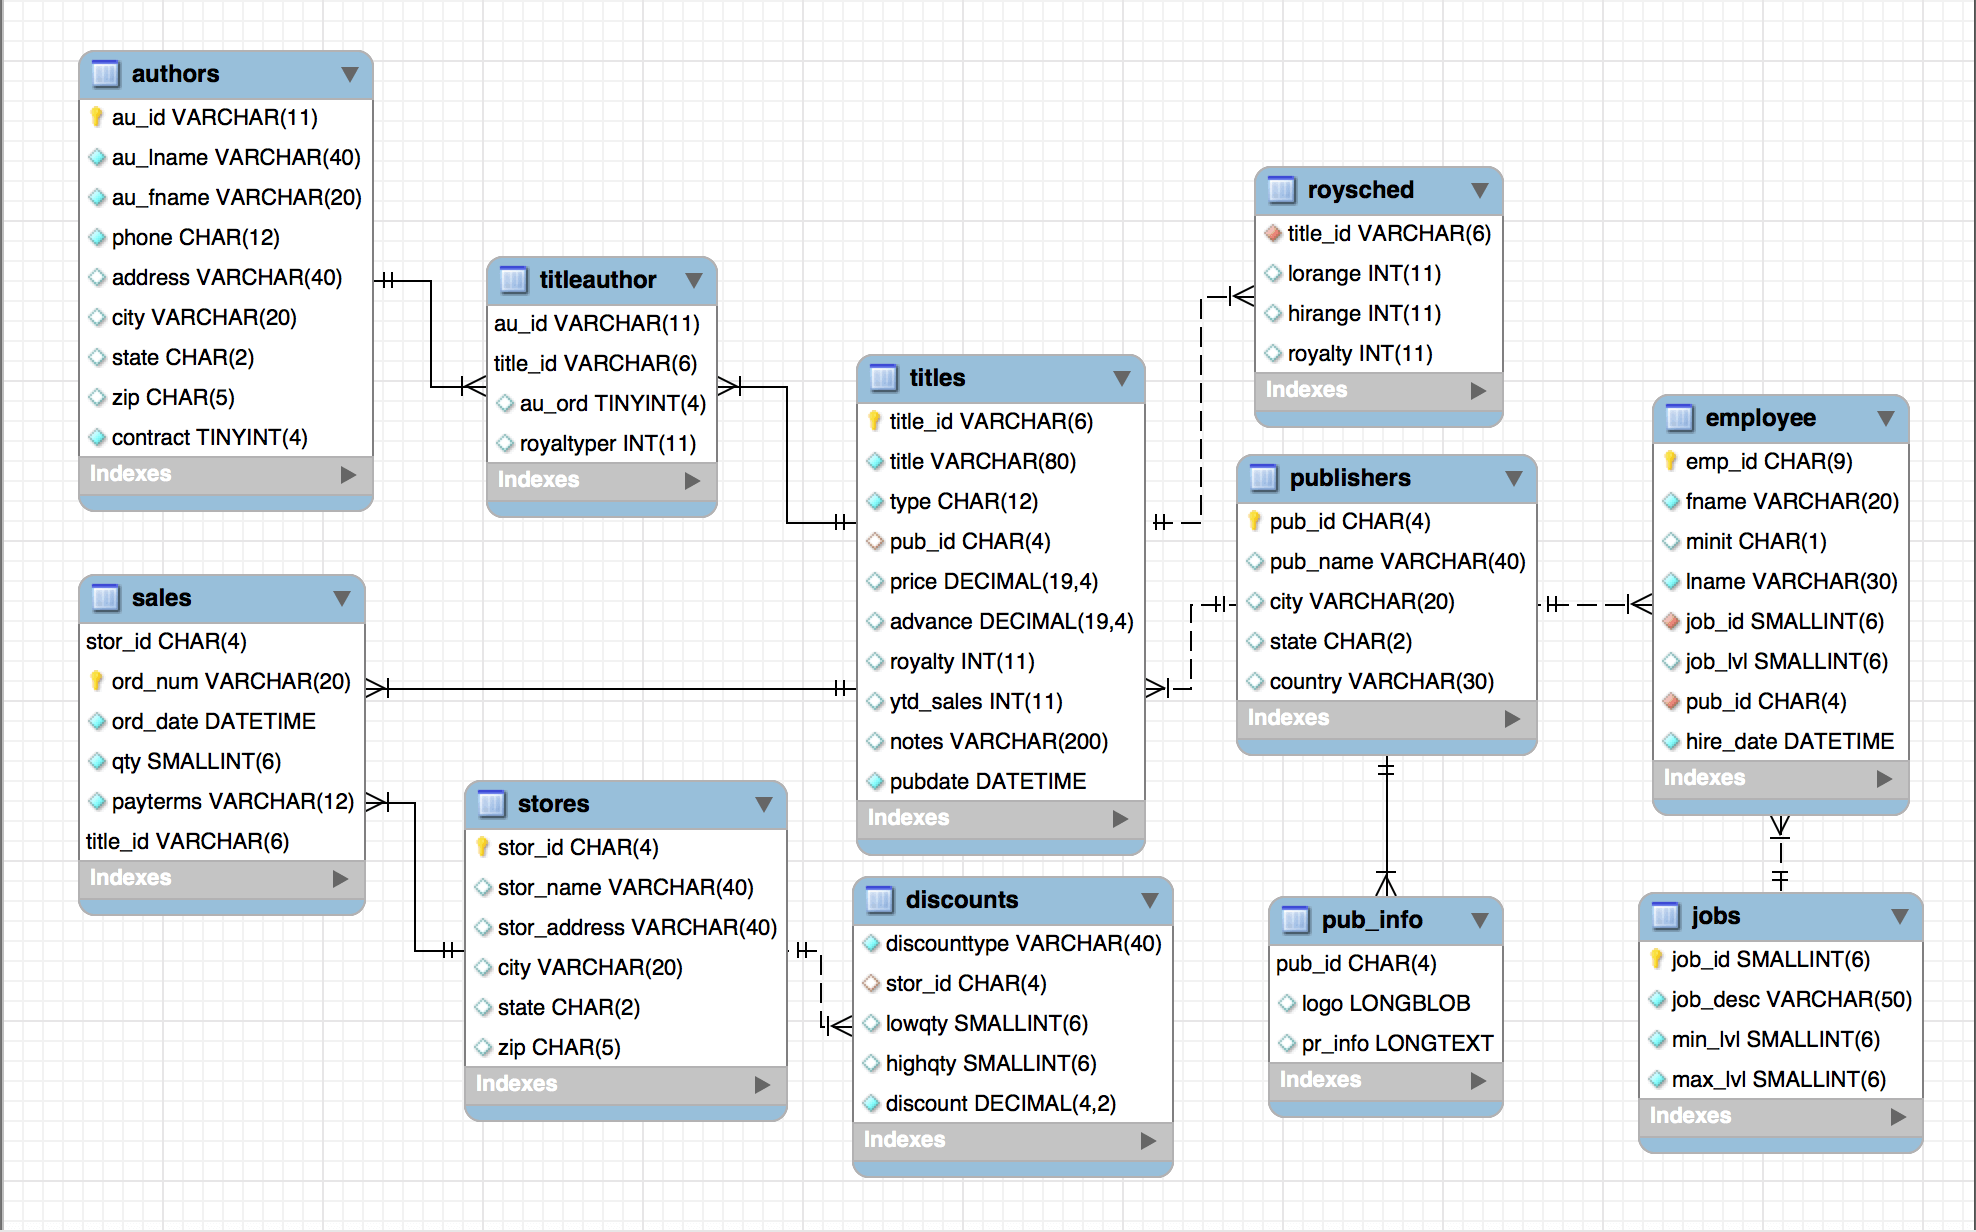
If you use pen and paper to create the design, take a picture with your phone and send the image to yourself. If you use software to create the database diagram, export in the image format (JPG or PNG). Either way, the image will be submitted as one of the deliverables.

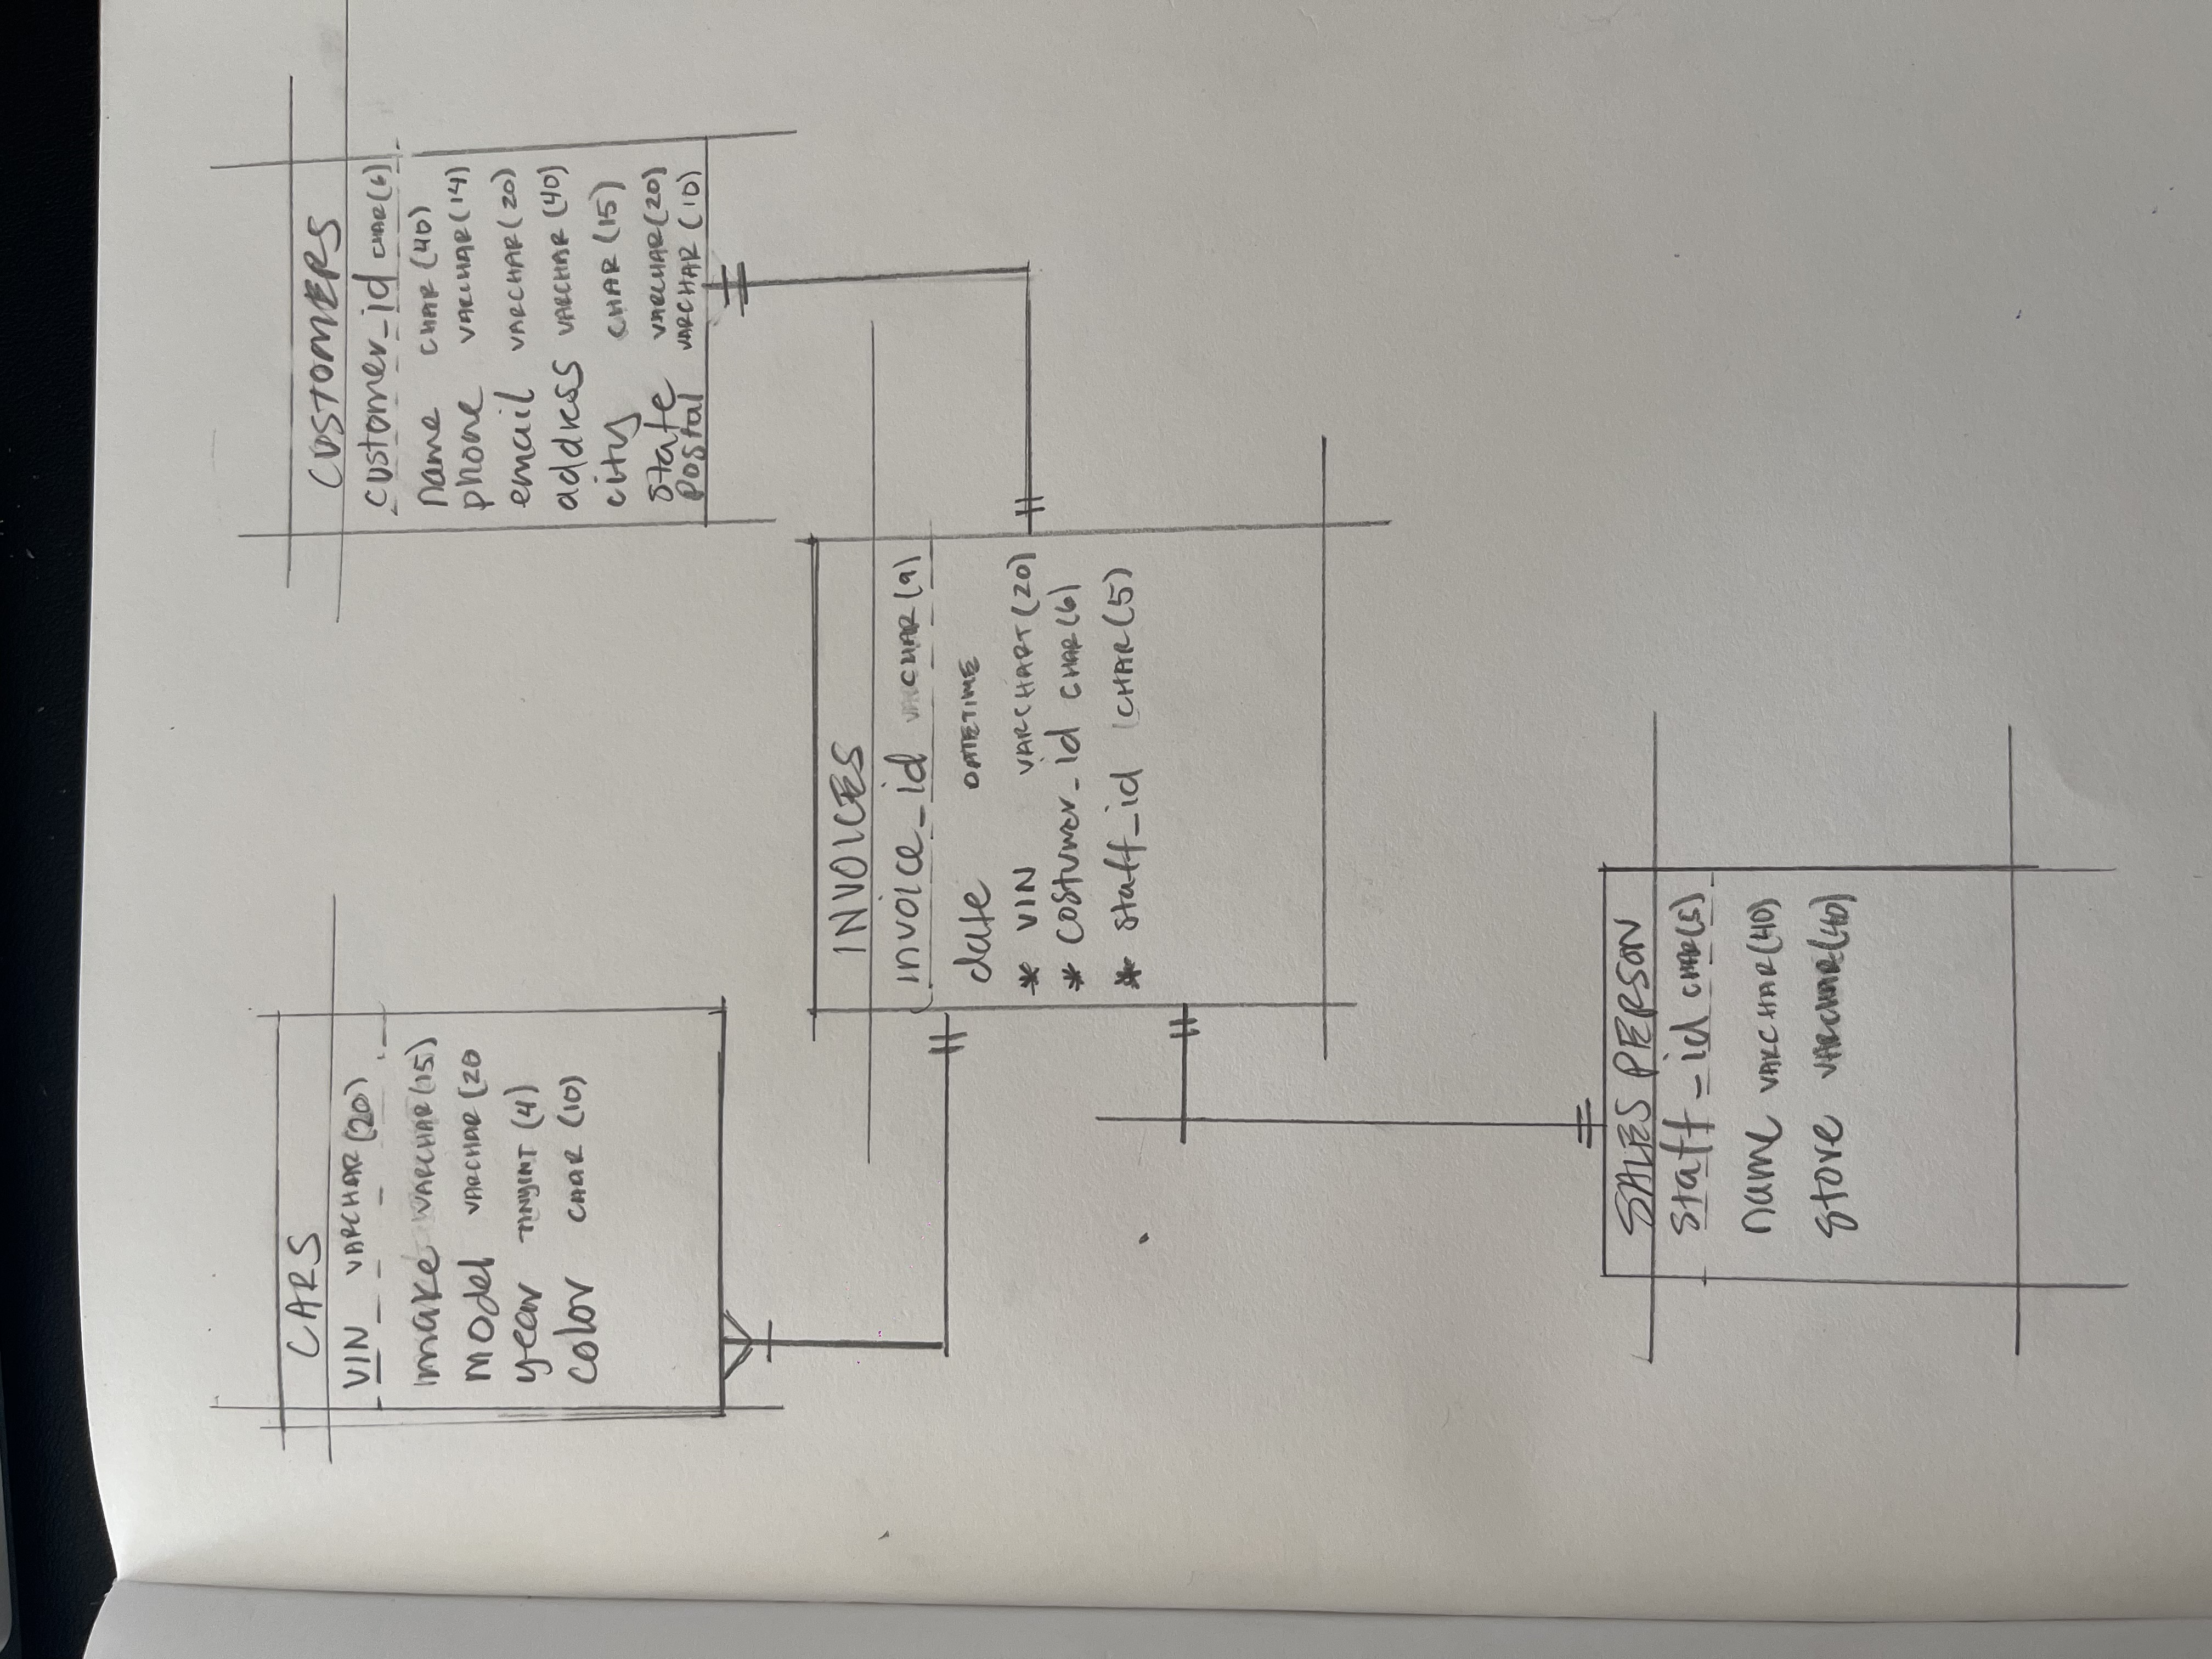

# Challenge 2 - Create the Database and Tables
Create a MySQL database for this lab. You can do so in the command line like this:

$ mysql -u your_username -p
mysql> CREATE DATABASE lab_mysql;
Query OK, 1 row affected (0.02 sec)
mysql> USE lab_mysql;
Database changed
Note: If you have set a password for the database user, you need to supply -p in the MySQL connection command. Once you hit enter, MySQL will ask you to type the password. If you didn't set the password for the database user, you don't need to supply -p in the connection command.

Now, based on the database design you created, write the SQL query to create the tables and columns. You will be using the CREATE TABLE statement for which you can find reference here.

You can test your CREATE TABLE statement in either SQL command line or the database software you installed (e.g. Sequel Pro or MySQL Workbench). Remember after creating each table, you need to delete it in order to test the same CREATE TABLE statement again.

After writing and testing all the statements, create a text file with the name create.sql. At the beginning of the file, indicate which database you want to use e.g.:

USE lab_mysql;
Then following the USE statement, write all your CREATE TABLE statements. You'll need one CREATE TABLE statement for each table you decide to create. Make sure to end each statement with a semicolon.

This .sql file will be one of your deliverables. A .sql file is often used by software/data engineers to automate database operations. For example, to execute all the commands in the create.sql file, you can simply execute source create.sql; in MySQL command line. Many programming languages such as Python and PHP can also execute .sql files.

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///CARS.db

In [3]:
%%sql 
CREATE TABLE Cars(VIN VARCHAR(20) PRIMARY KEY, make VARCHAR(15), model VARCHAR(20), year TINYINT(4), color CHAR(10));


 * sqlite:///CARS.db
(sqlite3.OperationalError) table Cars already exists
[SQL: CREATE TABLE Cars(VIN VARCHAR(20) PRIMARY KEY, make VARCHAR(15), model VARCHAR(20), year TINYINT(4), color CHAR(10));]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [6]:
%%sql
CREATE TABLE Customers(customer_id CHAR(6) PRIMARY KEY, name VARCHAR(40), phone VARCHAR(14), email VARCHAR(40), address VARCHAR(40), city CHAR(15), state VARCHAR(20), postal VARCHAR(10));
CREATE TABLE Salesperson(staff_id CHAR(5) PRIMARY KEY, name VARCHAR(40), store VARCHAR(40));
CREATE TABLE Invoices(invoice_id CHAR(9) PRIMARY KEY, date DATETIME, VIN VARCHAR(20), customer_id CHAR(6),staff_id CHAR(5));



 * sqlite:///CARS.db
Done.
Done.
Done.


[]

In [9]:
%%sql
SELECT name FROM sqlite_master
WHERE type='table'
ORDER BY name;

 * sqlite:///CARS.db
Done.


name
Cars
Customers
Invoices
Salesperson


# Challenge 3 - Seeding the Database
The purpose of database seeding is to provide some dummy data for an empty database so that software development can be started based on the dummy data. In this challenge you will create seeding.sql which inserts dummy data rows into the tables of your new database.

You'll be using the INSERT INTO statement for this purpose. A tutorial you can refer to can be fine here.

For your convenience, we provide you some example dummy data. These dummy data may not readily work with your database depending on how you have designed your database. You may need to change them to the appropriate form.


In [11]:
%%sql
INSERT INTO Cars (VIN,make,model,year,color) VALUES('3K096I98581DHSNUP','Volkswagen','Tiguan',2019,'Blue');
INSERT INTO Cars (VIN,make,model,year,color) VALUES('ZM8G7BEUQZ97IH46V','Peugeot','Rifter',2019,'Red');
INSERT INTO Cars (VIN,make,model,year,color) VALUES('RKXVNNIHLVVZOUB4M','Toyota','RAV4',2018,'White');
INSERT INTO Cars (VIN,make,model,year,color) VALUES('HKNDGS7CU31E9Z7JW','Ford','Fusion',2018,'Silver');
INSERT INTO Cars (VIN,make,model,year,color) VALUES('DAM41UDN3CHU2WVF6','Volvo','V60',2019,'Gray');
INSERT INTO Cars (VIN,make,model,year,color) VALUES('DAM41UDN3CHU2WBG7','Volvo','V60 Cross Country',2019,'Gray');


 * sqlite:///CARS.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [12]:
%sql SELECT * FROM cars;

 * sqlite:///CARS.db
Done.


VIN,make,model,year,color
3K096I98581DHSNUP,Volkswagen,Tiguan,2019,Blue
ZM8G7BEUQZ97IH46V,Peugeot,Rifter,2019,Red
RKXVNNIHLVVZOUB4M,Toyota,RAV4,2018,White
HKNDGS7CU31E9Z7JW,Ford,Fusion,2018,Silver
DAM41UDN3CHU2WVF6,Volvo,V60,2019,Gray
DAM41UDN3CHU2WBG7,Volvo,V60 Cross Country,2019,Gray


In [14]:
%%sql
INSERT INTO Customers (customer_id,name,phone,email,address,city,state,postal) VALUES('10001','Pablo Picasso','+34 636 17 63 82','a@gmail.com', 'Paseo de la Chopera, 14','Madrid','Madrid','Spain');
INSERT INTO Customers (customer_id,name,phone,email,address,city,state,postal) VALUES('20001','Abraham Lincoln','+1 305 907 7086','b@gmail.com', '120 SW 8th St','Miami','Florida','US');
INSERT INTO Customers (customer_id,name,phone,email,address,city,state,postal) VALUES('30001','Napoléon Bonaparte','+33 1 79 75 40 00','c@gmail.com', '40 Rue du Colisée','Paris','Île-de-France','France');

 * sqlite:///CARS.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [15]:
%sql SELECT * FROM customers;

 * sqlite:///CARS.db
Done.


customer_id,name,phone,email,address,city,state,postal
10001,Pablo Picasso,+34 636 17 63 82,a@gmail.com,"Paseo de la Chopera, 14",Madrid,Madrid,Spain
20001,Abraham Lincoln,+1 305 907 7086,b@gmail.com,120 SW 8th St,Miami,Florida,US
30001,Napoléon Bonaparte,+33 1 79 75 40 00,c@gmail.com,40 Rue du Colisée,Paris,Île-de-France,France


In [17]:
%%sql
INSERT INTO Salesperson (staff_id,name,store) VALUES('00001','Petey Cruiser','Madrid');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00002','Anna Sthesia','Barcelona');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00003','Paul Molive','Berlin');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00004','Gail Forcewind','Paris');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00005','Paige Turner','Miami');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00006','Bob Frapples','Mexico City');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00007','Walter Melon','Amsterdam');
INSERT INTO Salesperson (staff_id,name,store) VALUES('00008','Shonda Leer','São Paulo');

 * sqlite:///CARS.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [18]:
%sql SELECT * FROM salesperson;

 * sqlite:///CARS.db
Done.


staff_id,name,store
00001,Petey Cruiser,Madrid
00002,Anna Sthesia,Barcelona
00003,Paul Molive,Berlin
00004,Gail Forcewind,Paris
00005,Paige Turner,Miami
00006,Bob Frapples,Mexico City
00007,Walter Melon,Amsterdam
00008,Shonda Leer,São Paulo


In [19]:
%%sql
INSERT INTO Invoices (invoice_id,date,VIN,customer_id,staff_id) VALUES('852399038',22-08-2018,'3K096I98581DHSNUP','20001','00004');
INSERT INTO Invoices (invoice_id,date,VIN,customer_id,staff_id) VALUES('731166526',31-12-2018,'HKNDGS7CU31E9Z7JW','10001','00006');
INSERT INTO Invoices (invoice_id,date,VIN,customer_id,staff_id) VALUES('271135104',22-01-2019,'RKXVNNIHLVVZOUB4M','30001','00008');


 * sqlite:///CARS.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [21]:
%sql SELECT * FROM invoices;

 * sqlite:///CARS.db
Done.


invoice_id,date,VIN,customer_id,staff_id
852399038,-2004,3K096I98581DHSNUP,20001,00004
731166526,-1999,HKNDGS7CU31E9Z7JW,10001,00006
271135104,-1998,RKXVNNIHLVVZOUB4M,30001,00008


# Bonus Challenge - Updating and Deleting Database Records
Now you find an error you need to fix in your existing data - in the Salespersons table, you mistakenly spelled Miami as Mimia for Paige Turner. Also, you received the email addresses of the three customers:

Name	Email
Pablo Picasso	ppicasso@gmail.com
Abraham Lincoln	lincoln@us.gov
Napoléon Bonaparte	hello@napoleon.me
Create update.sql to update your existing data.

In addition, you also find a duplicated car entry for VIN DAM41UDN3CHU2WVF6. You want to delete car ID #5 from the database. Create delete.sql to perform the deletion.



In [23]:
%%sql
UPDATE customers
SET email='ppicasso@gmail.com'
WHERE customer_id= 10001;

 * sqlite:///CARS.db
1 rows affected.


[]

In [25]:
%%sql
UPDATE customers
SET email='lincoln@us.gov'
WHERE customer_id= 20001;

 * sqlite:///CARS.db
1 rows affected.


[]

In [26]:
%%sql
UPDATE customers
SET email='hello@napoleon.me'
WHERE customer_id= 30001;

 * sqlite:///CARS.db
1 rows affected.


[]

In [27]:
%sql SELECT * FROM customers;

 * sqlite:///CARS.db
Done.


customer_id,name,phone,email,address,city,state,postal
10001,Pablo Picasso,+34 636 17 63 82,ppicasso@gmail.com,"Paseo de la Chopera, 14",Madrid,Madrid,Spain
20001,Abraham Lincoln,+1 305 907 7086,lincoln@us.gov,120 SW 8th St,Miami,Florida,US
30001,Napoléon Bonaparte,+33 1 79 75 40 00,hello@napoleon.me,40 Rue du Colisée,Paris,Île-de-France,France


In [30]:
%%sql
UPDATE invoices
SET date='22-08-2018'
WHERE invoice_id=852399038;
UPDATE invoices
SET date='31-12-2018'
WHERE invoice_id=731166526;
UPDATE invoices
SET date='22-01-2019'
WHERE invoice_id=271135104;

 * sqlite:///CARS.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [31]:
%sql SELECT * FROM invoices;

 * sqlite:///CARS.db
Done.


invoice_id,date,VIN,customer_id,staff_id
852399038,22-08-2018,3K096I98581DHSNUP,20001,00004
731166526,31-12-2018,HKNDGS7CU31E9Z7JW,10001,00006
271135104,22-01-2019,RKXVNNIHLVVZOUB4M,30001,00008


In [32]:
%%sql
DELETE FROM cars
WHERE model='V60 Cross Country'

 * sqlite:///CARS.db
1 rows affected.


[]

In [33]:
%sql SELECT * FROM cars;

 * sqlite:///CARS.db
Done.


VIN,make,model,year,color
3K096I98581DHSNUP,Volkswagen,Tiguan,2019,Blue
ZM8G7BEUQZ97IH46V,Peugeot,Rifter,2019,Red
RKXVNNIHLVVZOUB4M,Toyota,RAV4,2018,White
HKNDGS7CU31E9Z7JW,Ford,Fusion,2018,Silver
DAM41UDN3CHU2WVF6,Volvo,V60,2019,Gray
